In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/gurgaon_properties_cleaned_and_outliers_treated.csv")
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_bedroom_ratio
0,0,flat,ireo victory valley,sector 67,2.95,12110.0,2436.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,...,2236.000000,2036.000000,0,1,0,1,0,0,165.0,812.00
1,1,house,sobha city,sector 108,10.50,14323.0,7331.0,Built Up area: 7331 (681.07 sq.m.),5,4,...,7330.969373,NaN,0,0,0,0,0,1,59.0,1466.20
2,2,flat,signature global grand iva,sector 103,0.30,8287.0,362.0,Carpet area: 361.88 (33.62 sq.m.),1,2,...,NaN,361.882318,0,0,0,0,0,1,37.0,362.00
3,3,flat,parsvnath exotica,sector 53,6.44,19003.0,3389.0,Super Built up area 3390(314.94 sq.m.),4,4,...,NaN,NaN,0,1,0,0,0,0,80.0,847.25
4,4,flat,citizen apartment,sector 51,3.55,6826.0,5201.0,Built Up area: 5200 (483.1 sq.m.)Carpet area: ...,5,6,...,5200.040090,4700.000000,1,1,1,1,0,0,157.0,1040.20


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1067
agePossession             0
super_built_up_area    1753
built_up_area          2043
carpet_area            1763
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              1
area_bedroom_ratio        0
dtype: int64

<ipython-input-5-2af6b513a60c>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'], palette="viridis")


<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

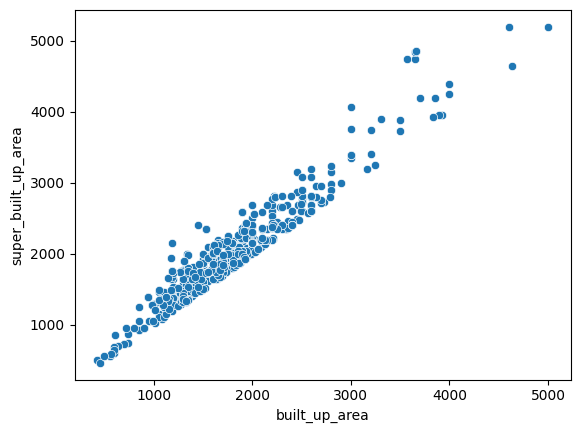

In [5]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'], palette="viridis")

<ipython-input-6-d17966961f21>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'], palette="viridis")


<Axes: xlabel='built_up_area', ylabel='carpet_area'>

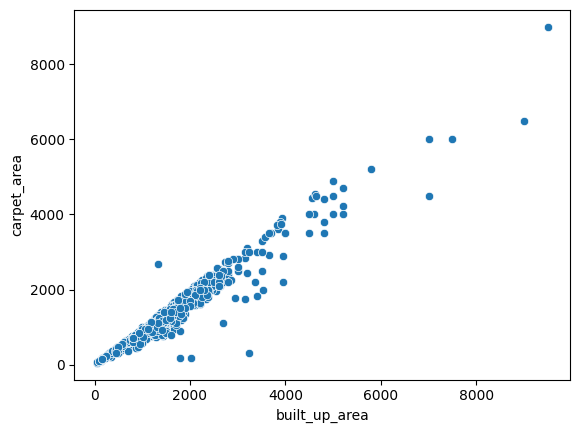

In [6]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'], palette="viridis")

In [7]:
# Checking for rows in which we dont have all the 3 types of areas
df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_bedroom_ratio


In [8]:
# Rows where all three values are available
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
all_present_df[['super_built_up_area','built_up_area','carpet_area']]

,super_built_up_area,built_up_area,carpet_area
0,2436.0,2236.0,2036.0
10,1450.0,1400.0,1000.0
11,2191.0,2091.0,1991.0
13,1755.0,1600.0,1400.0
20,1445.0,1300.0,1200.0
...,...,...,...
3622,1385.0,940.0,845.0
3626,1760.0,1186.0,1130.0
3635,1385.0,1120.0,940.0
3659,1877.0,1800.0,1500.0


In [9]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ration = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [10]:
print(super_to_built_up_ratio,carpet_to_built_up_ration)

1.1051948051948053 0.9


In [11]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sbc_df[['super_built_up_area','built_up_area','carpet_area']]

,super_built_up_area,built_up_area,carpet_area
6,1650.0,NaN,1022.58
16,1423.0,NaN,1250.00
18,1880.0,NaN,1128.00
23,626.0,NaN,526.00
25,3150.0,NaN,2650.00
...,...,...,...
3627,2356.0,NaN,1750.00
3641,1950.0,NaN,1161.00
3643,2727.0,NaN,2300.00
3648,1340.0,NaN,1000.00


In [12]:
sbc_df['built_up_area'].fillna( round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9) )/2), inplace=True )

<ipython-input-12-17a6c64db603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna( round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9) )/2), inplace=True )


In [13]:
sbc_df[['super_built_up_area','built_up_area','carpet_area']]

,super_built_up_area,built_up_area,carpet_area
6,1650.0,1315.0,1022.58
16,1423.0,1338.0,1250.00
18,1880.0,1477.0,1128.00
23,626.0,575.0,526.00
25,3150.0,2898.0,2650.00
...,...,...,...
3627,2356.0,2038.0,1750.00
3641,1950.0,1527.0,1161.00
3643,2727.0,2512.0,2300.00
3648,1340.0,1162.0,1000.00


In [14]:
df.update(sbc_df)

In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1067
agePossession             0
super_built_up_area    1753
built_up_area          1616
carpet_area            1763
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              1
area_bedroom_ratio        0
dtype: int64

In [16]:
# sb is present c is null and b is null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [17]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_bedroom_ratio
3,flat,parsvnath exotica,sector 53,6.44,19003.0,3389.0,Super Built up area 3390(314.94 sq.m.),4,4,3,...,NaN,NaN,0,1,0,0,0,0,80.0,847.250000
5,flat,signature global park,sohna road,0.79,7308.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3+,...,NaN,NaN,0,0,0,0,0,1,109.0,360.333333
7,flat,green campus chs,manesar,0.90,3935.0,2287.0,Super Built up area 2287(212.47 sq.m.),3,3,3+,...,NaN,NaN,0,1,0,0,0,1,5.0,762.333333
12,flat,bestech park view sanskruti,sector 92,1.83,7871.0,2325.0,Super Built up area 2325(216 sq.m.),4,3,3,...,NaN,NaN,0,1,0,0,0,1,128.0,581.250000
15,flat,godrej nature plus,sector 33,1.35,8671.0,1557.0,Super Built up area 1557(144.65 sq.m.),3,2,3+,...,NaN,NaN,0,0,0,0,0,1,38.0,519.000000


In [18]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-18-554030e2e595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [19]:
df.update(sb_df)

In [20]:
# sb null c is present b is null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [21]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-21-747bc7ee3c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [22]:
df.update(c_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1067
agePossession             0
super_built_up_area    1753
built_up_area             0
carpet_area            1763
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              1
area_bedroom_ratio        0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

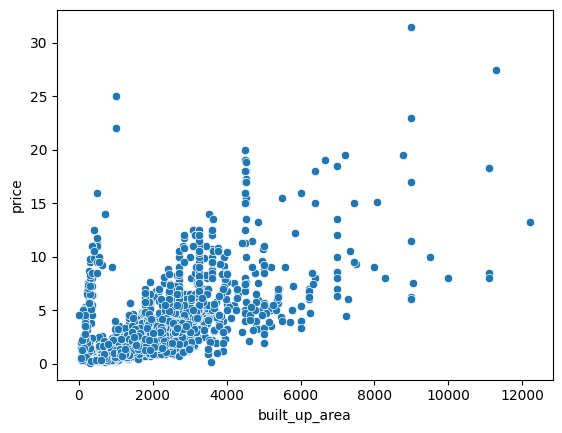

In [24]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [25]:
# In the plot we can see that there are some point below 2000 those are different from the normal pattern
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [26]:
anamoly_df.sample(5)
# here with area the price is justified but with built up area it does so lets put the value of area in built_up_area

,price,area,built_up_area
508,2.80,2048.0,1853.0
1768,2.95,1845.0,1845.0
3288,4.50,3150.0,14.0
3518,2.85,2045.0,1640.0
1409,3.00,1975.0,1787.0


In [27]:
anamoly_df['built_up_area'] = anamoly_df['area']

df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

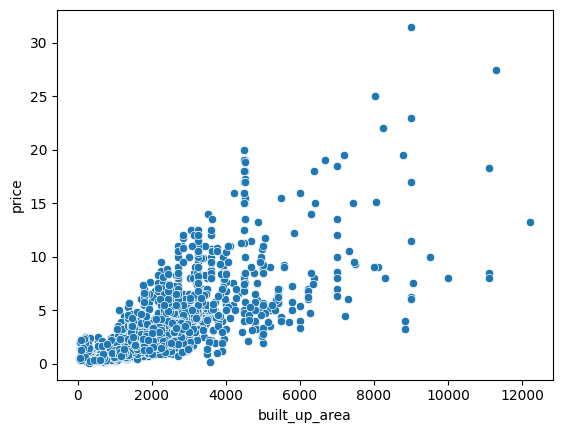

In [28]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [29]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_bedroom_ratio'],inplace=True)

In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,South,Moderately Old,2236.000000,0,1,0,1,0,0,165.0
1,house,sobha city,sector 108,10.50,14323.0,5,4,3+,1.0,East,Undefined,7330.969373,0,0,0,0,0,1,59.0
2,flat,signature global grand iva,sector 103,0.30,8287.0,1,2,2,5.0,NaN,New Property,402.000000,0,0,0,0,0,1,37.0
3,flat,parsvnath exotica,sector 53,6.44,19003.0,4,4,3,7.0,West,Moderately Old,3068.000000,0,1,0,0,0,0,80.0
4,flat,citizen apartment,sector 51,3.55,6826.0,5,6,3+,11.0,North,Moderately Old,5200.040090,1,1,1,1,0,0,157.0


## Floornum

In [31]:
df[df['floorNum'].isnull()]
# in all these rows only 2 flats are there and rest are houses

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
61,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.000000,0,1,1,1,0,1,88.0
488,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.000000,0,0,0,0,0,1,9.0
1605,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1757.960148,0,0,0,0,0,1,0.0
1653,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.000000,0,0,0,0,0,1,9.0
2086,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.000000,0,1,1,1,0,0,114.0
2308,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.052455,0,0,0,0,0,1,0.0
2389,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.000000,0,0,0,0,0,1,0.0
2404,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.000000,0,0,0,0,0,1,28.0
2425,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.000000,0,0,0,0,0,1,0.0
2486,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.000000,1,1,1,1,0,1,0.0


In [32]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [33]:
df['floorNum'].fillna(2.0, inplace=True)

In [42]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [37]:
df.dropna(subset=['society'], inplace=True)

In [41]:
df.dropna(subset=['luxury_score'], inplace=True)

## Facing

In [35]:
df.drop(['facing'],axis=1,inplace=True)

## Age Possession

In [43]:
df['agePossession'].value_counts()

agePossession
Relatively New        1630
New Property           587
Moderately Old         556
Undefined              315
Old Property           297
Under Construction     278
Name: count, dtype: int64

In [46]:
# Undefined - ask sector and property type -> search for the same property type and sector rows and
# then replace with the mode
# Because the age of property is depending upon the sector new sectors have new properties
def mode_based_imputation(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.NaN
  else:
    return row['agePossession']

In [49]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [50]:
df['agePossession'].value_counts()

agePossession
Relatively New        1754
New Property           629
Moderately Old         597
Old Property           331
Under Construction     296
Undefined               56
Name: count, dtype: int64

In [51]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1764
New Property           630
Moderately Old         604
Old Property           337
Under Construction     296
Undefined               32
Name: count, dtype: int64

In [54]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1766
Moderately Old         634
New Property           630
Old Property           337
Under Construction     296
Name: count, dtype: int64

In [57]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)